# Classification Using neuron network

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_row',1000)
%matplotlib inline

## Data Preparation

In [47]:
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df2 = pd.DataFrame(iris['target'],columns=['target'])
df = pd.concat([df,df2],axis=1)
scaler = StandardScaler()
df[iris['feature_names']] = scaler.fit_transform(df[iris['feature_names']])

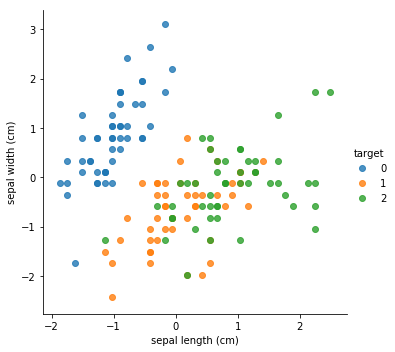

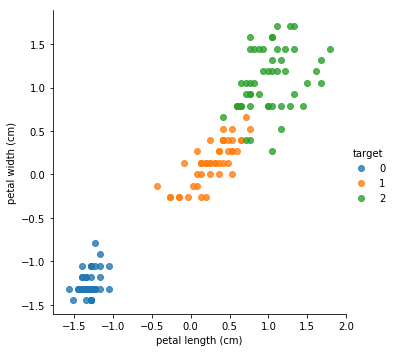

In [48]:
import seaborn as sns
sns.lmplot(x='sepal length (cm)', y = 'sepal width (cm)', hue='target',data=df,fit_reg=False)
sns.lmplot(x='petal length (cm)', y = 'petal width (cm)', hue='target',data=df,fit_reg=False)

In [57]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
train_X,test_X,train_Y,test_Y = train_test_split(df[iris['feature_names']],df['target'],test_size=0.2,random_state=0)

train_Y = np_utils.to_categorical(train_Y,num_classes=3)
test_Y = np_utils.to_categorical(test_Y,num_classes=3)
print(train_Y.shape)
print(test_Y.shape)

(120, 3)
(30, 3)


## Build Up Model

In [58]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, input_dim=4,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_74 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_75 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 93        
Total params: 7,173
Trainable params: 7,173
Non-trainable params: 0
_________________________________________________________________


## Training

In [59]:
model.fit(train_X,train_Y, batch_size=20, epochs=10)
result = model.predict(test_X)
result = np.argmax(result,axis=1)
label = np.argmax(test_Y,axis=1)
accu = np.sum(result==label)/len(result)*100
print(accu)

Epoch 1/10
120/120 [==============================] - 0s 4ms/step - loss: 1.0628 - acc: 0.5250
Epoch 2/10
120/120 [==============================] - 0s 91us/step - loss: 0.9225 - acc: 0.8000
Epoch 3/10
120/120 [==============================] - 0s 83us/step - loss: 0.8026 - acc: 0.8583
Epoch 4/10
120/120 [==============================] - 0s 83us/step - loss: 0.6909 - acc: 0.8667
Epoch 5/10
120/120 [==============================] - 0s 91us/step - loss: 0.5920 - acc: 0.8500
Epoch 6/10
120/120 [==============================] - 0s 91us/step - loss: 0.5086 - acc: 0.8667
Epoch 7/10
120/120 [==============================] - 0s 67us/step - loss: 0.4494 - acc: 0.8750
Epoch 8/10
120/120 [==============================] - 0s 75us/step - loss: 0.4028 - acc: 0.8750
Epoch 9/10
120/120 [==============================] - 0s 92us/step - loss: 0.3614 - acc: 0.8667
Epoch 10/10
120/120 [==============================] - 0s 74us/step - loss: 0.3266 - acc: 0.8667
76.66666666666667
